# Netflix Data Analysis using Python

## Project Description
This project performs exploratory data analysis (EDA) on the Netflix Movies and TV Shows dataset to understand content trends, genre popularity, country-wise distribution, ratings, and release patterns.

**Project Type:** Team-based Academic Project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
df = pd.read_csv("netflix_titles.csv", encoding="latin1")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [5]:
df.dropna(axis=1, how='all', inplace=True)
df.drop_duplicates(inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['country'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)


/tmp/ipython-input-3671295759.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3671295759.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

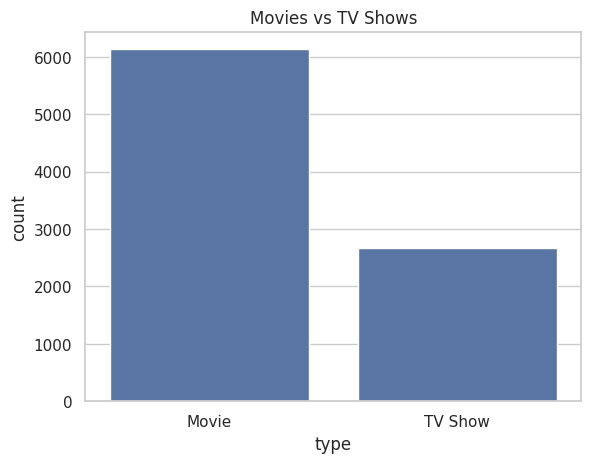

In [6]:
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows")
plt.show()


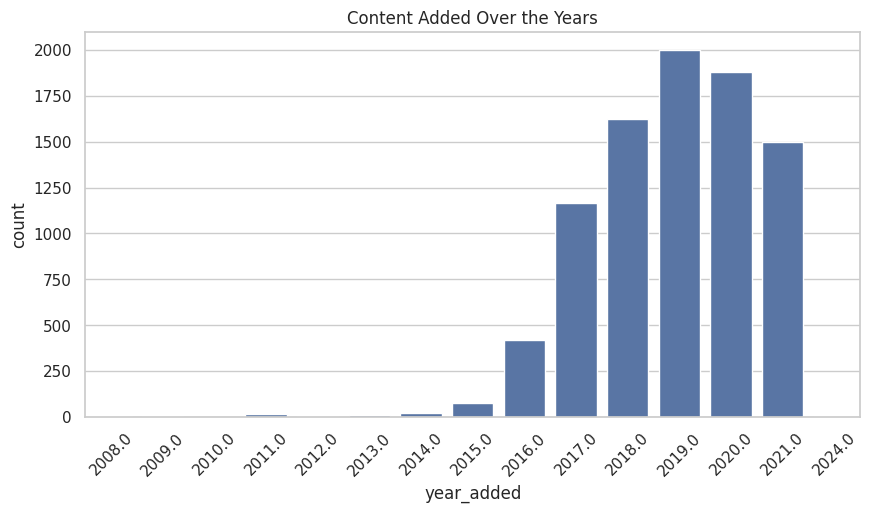

In [7]:
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10,5))
sns.countplot(x='year_added', data=df)
plt.xticks(rotation=45)
plt.title("Content Added Over the Years")
plt.show()


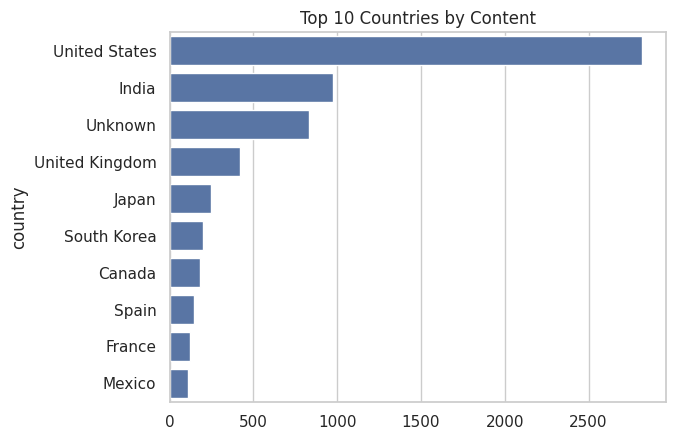

In [8]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Content")
plt.show()


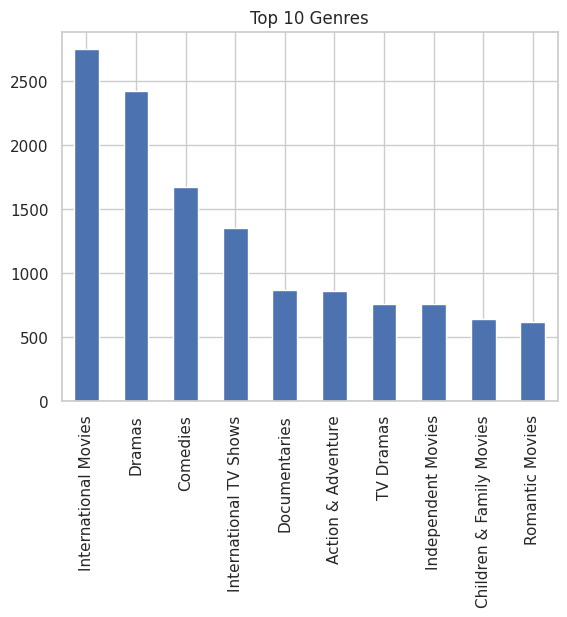

In [9]:
genre_list = df['listed_in'].str.split(', ')
genres = [g for sub in genre_list.dropna() for g in sub]

pd.Series(genres).value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres")
plt.show()


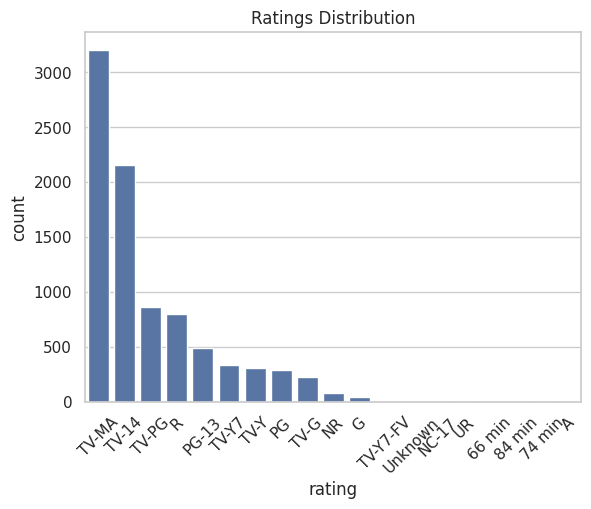

In [10]:
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Ratings Distribution")
plt.show()


/tmp/ipython-input-3654429082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min','')
/tmp/ipython-input-3654429082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')


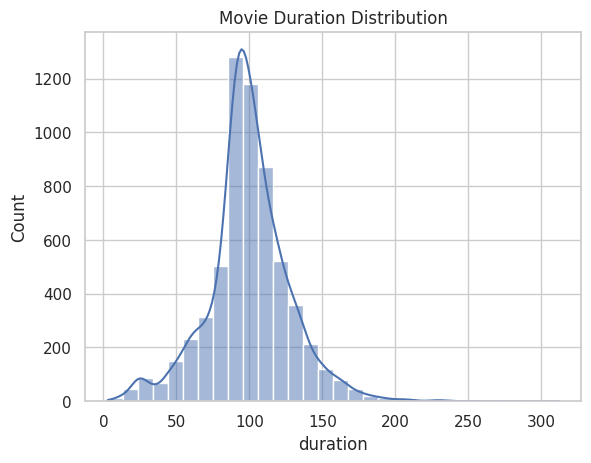

In [11]:
movies = df[df['type'] == 'Movie']
movies['duration'] = movies['duration'].str.replace(' min','')
movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')

sns.histplot(movies['duration'], bins=30, kde=True)
plt.title("Movie Duration Distribution")
plt.show()


## Key Insights
- Movies dominate Netflix content
- Most content was added after 2015
- USA and India lead in content production
- Drama and Comedy are most common genres
- Majority content targets mature audiences
